In [ ]:
import pandas as pd

df = pd.read_csv("algos_regex_rectified_bugfixes_with_files.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1012, 12)


,hash,msg,filename,source_before,source_after,diff,llm_message,rectified,rectified_message,dev_precise,llm_precise,rectified_precise
0,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,TODO.md,NaN,NaN,NaN,fix bug in test-http-client,True,Code changes; in TODO.md,True,True,False
1,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,diffusion.py,import asyncio\nimport json\nfrom typing impor...,import asyncio\nimport json\nfrom typing impor...,"@@ -7,36 +7,44 @@ from . import settings\n fro...",add tests for the rest of the qnet api,True,modified code; added/changed functions: __init...,True,True,True
2,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,document.py,import krita\nfrom krita import Krita\nfrom .i...,import krita\nfrom krita import Krita\nfrom .i...,"@@ -16,6 +16,14 @@ class Document:\n @prop...",add missing docutils methods,True,added code; added/changed functions: is_active...,True,True,True
3,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,settings.py,import os \n\n# Images with width/height large...,import os \n\n# Images with width/height large...,"@@ -4,7 +4,7 @@ import os\n max_inpaint_resolu...",add batch size to the debug image,True,modified code; bug fix; (+1 -1 lines); in sett...,True,True,True
4,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,widget.py,import asyncio\n\nfrom PyQt5.QtWidgets import ...,from __future__ import annotations\nfrom enum ...,"@@ -1,190 +1,393 @@\n+from __future__ import a...",add missing docstrings,True,modified code; added/changed functions: __init...,True,True,True


In [ ]:
total_commits = df['hash'].nunique()
total_files = df['filename'].nunique()

avg_files_per_commit = df.groupby('hash')['filename'].nunique().mean()

fix_type_dist = df['llm_message'].value_counts()

df['ext'] = df['filename'].str.split('.').str[-1]
ext_dist = df['ext'].value_counts()

print("Total commits:", total_commits)
print("Total files:", total_files)
print("Average files per commit:", avg_files_per_commit)
print("\nFix type distribution:\n", fix_type_dist)
print("\nMost modified file extensions:\n", ext_dist.head(10))


Total commits: 352
Total files: 167
Average files per commit: 2.8068181818181817

Fix type distribution:
 llm_message
add missing import                                 25
add missing docstrings                             19
add test for                                       12
add missing description                            11
add missing docstring                              10
                                                   ..
add docs for the screen scale and version icons     1
fix bug in bind_combo                               1
add docs for krita-document                         1
add docstrings for liveworkspace                    1
add support for tiled vae                           1
Name: count, Length: 811, dtype: int64

Most modified file extensions:
 ext
py            818
json           64
svg            28
md             21
png            20
Dockerfile      8
toml            7
mdx             7
astro           5
yml             5
Name: count, dtype: int64


In [3]:
fix_type_dist.to_csv("fix_type.csv")

In [ ]:
from radon.metrics import mi_visit, mi_rank
from radon.complexity import cc_visit
from radon.raw import analyze

def analyze_code_metrics(code):
    """Return Maintainability Index, Cyclomatic Complexity, and LOC."""
    if not isinstance(code, str) or not code.strip():
        return (None, None, None)

    try:
        mi_score = mi_visit(code, True)
        cc_results = cc_visit(code)
        cc_score = sum([c.complexity for c in cc_results]) / len(cc_results) if cc_results else 0
        loc = analyze(code).loc
        return (mi_score, cc_score, loc)
    except Exception:
        return (None, None, None)

df[['MI_Before','CC_Before','LOC_Before']] = df['source_before'].apply(lambda c: pd.Series(analyze_code_metrics(c)))
df[['MI_After','CC_After','LOC_After']]   = df['source_after'].apply(lambda c: pd.Series(analyze_code_metrics(c)))

df['MI_Change']  = df['MI_After'] - df['MI_Before']
df['CC_Change']  = df['CC_After'] - df['CC_Before']
df['LOC_Change'] = df['LOC_After'] - df['LOC_Before']

df.head()


,hash,msg,filename,source_before,source_after,diff,llm_message,rectified,rectified_message,dev_precise,...,ext,MI_Before,CC_Before,LOC_Before,MI_After,CC_After,LOC_After,MI_Change,CC_Change,LOC_Change
0,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,TODO.md,NaN,NaN,NaN,fix bug in test-http-client,True,Code changes; in TODO.md,True,...,md,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,diffusion.py,import asyncio\nimport json\nfrom typing impor...,import asyncio\nimport json\nfrom typing impor...,"@@ -7,36 +7,44 @@ from . import settings\n fro...",add tests for the rest of the qnet api,True,modified code; added/changed functions: __init...,True,...,py,48.588562,1.952381,215.0,50.403651,1.956522,251.0,1.815090,0.004141,36.0
2,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,document.py,import krita\nfrom krita import Krita\nfrom .i...,import krita\nfrom krita import Krita\nfrom .i...,"@@ -16,6 +16,14 @@ class Document:\n @prop...",add missing docutils methods,True,added code; added/changed functions: is_active...,True,...,py,62.680045,1.500000,52.0,58.393812,1.400000,60.0,-4.286233,-0.100000,8.0
3,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,settings.py,import os \n\n# Images with width/height large...,import os \n\n# Images with width/height large...,"@@ -4,7 +4,7 @@ import os\n max_inpaint_resolu...",add batch size to the debug image,True,modified code; bug fix; (+1 -1 lines); in sett...,True,...,py,100.000000,0.000000,10.0,100.000000,0.000000,10.0,0.000000,0.000000,0.0
4,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,widget.py,import asyncio\n\nfrom PyQt5.QtWidgets import ...,from __future__ import annotations\nfrom enum ...,"@@ -1,190 +1,393 @@\n+from __future__ import a...",add missing docstrings,True,modified code; added/changed functions: __init...,True,...,py,31.948293,2.166667,190.0,25.995629,1.904762,393.0,-5.952664,-0.261905,203.0


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model = AutoModel.from_pretrained("microsoft/codebert-base")

def embed_code(text):
    """Return CLS embedding of code snippet."""
    if not isinstance(text, str) or not text.strip():
        return np.zeros(768)
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=256)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:,0,:].numpy().flatten()

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-10)

semantic_sims = []
for _, row in df.iterrows():
    emb_before = embed_code(row['source_before'])
    emb_after  = embed_code(row['source_after'])
    sim = cosine_similarity(emb_before, emb_after)
    semantic_sims.append(sim)

df['Semantic_Similarity'] = semantic_sims


/opt/homebrew/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import sacrebleu

def bleu_score(before, after):
    if not isinstance(before, str) or not isinstance(after, str):
        return 0.0
    bleu = sacrebleu.sentence_bleu(after, [before])
    return bleu.score / 100.0  

df['Token_Similarity'] = df.apply(
    lambda row: bleu_score(row['source_before'], row['source_after']),
    axis=1
)


In [7]:
SEM_THRESHOLD = 0.80
TOK_THRESHOLD = 0.75

df['Semantic_class'] = df['Semantic_Similarity'].apply(lambda x: "Minor" if x >= SEM_THRESHOLD else "Major")
df['Token_class']    = df['Token_Similarity'].apply(lambda x: "Minor" if x >= TOK_THRESHOLD else "Major")

df['Classes_Agree'] = df.apply(
    lambda row: "YES" if row['Semantic_class'] == row['Token_class'] else "NO", axis=1
)

df.head()


,hash,msg,filename,source_before,source_after,diff,llm_message,rectified,rectified_message,dev_precise,...,CC_After,LOC_After,MI_Change,CC_Change,LOC_Change,Semantic_Similarity,Token_Similarity,Semantic_class,Token_class,Classes_Agree
0,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,TODO.md,NaN,NaN,NaN,fix bug in test-http-client,True,Code changes; in TODO.md,True,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,Major,Major,YES
1,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,diffusion.py,import asyncio\nimport json\nfrom typing impor...,import asyncio\nimport json\nfrom typing impor...,"@@ -7,36 +7,44 @@ from . import settings\n fro...",add tests for the rest of the qnet api,True,modified code; added/changed functions: __init...,True,...,1.956522,251.0,1.815090,0.004141,36.0,0.998641,0.680473,Minor,Major,NO
2,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,document.py,import krita\nfrom krita import Krita\nfrom .i...,import krita\nfrom krita import Krita\nfrom .i...,"@@ -16,6 +16,14 @@ class Document:\n @prop...",add missing docutils methods,True,added code; added/changed functions: is_active...,True,...,1.400000,60.0,-4.286233,-0.100000,8.0,0.998653,0.895764,Minor,Minor,YES
3,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,settings.py,import os \n\n# Images with width/height large...,import os \n\n# Images with width/height large...,"@@ -4,7 +4,7 @@ import os\n max_inpaint_resolu...",add batch size to the debug image,True,modified code; bug fix; (+1 -1 lines); in sett...,True,...,0.000000,10.0,0.000000,0.000000,0.0,0.999980,0.967832,Minor,Minor,YES
4,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,widget.py,import asyncio\n\nfrom PyQt5.QtWidgets import ...,from __future__ import annotations\nfrom enum ...,"@@ -1,190 +1,393 @@\n+from __future__ import a...",add missing docstrings,True,modified code; added/changed functions: __init...,True,...,1.904762,393.0,-5.952664,-0.261905,203.0,0.992689,0.448762,Minor,Major,NO


In [ ]:
agreement_rate = (df['Classes_Agree'] == "YES").mean()

print("Agreement rate between Semantic and Token classifications:", agreement_rate)

disagreements = df[df['Classes_Agree'] == "NO"]
agreements = df[df['Classes_Agree'] == "YES"]
print("Number of disagreements:", disagreements.shape[0])
print("Number of agreements:", agreements.shape[0])

disagreements.head()
df.head()


Agreement rate between Semantic and Token classifications: 0.9723320158102767
Number of disagreements: 28
Number of agreements: 984


,hash,msg,filename,source_before,source_after,diff,llm_message,rectified,rectified_message,dev_precise,...,CC_After,LOC_After,MI_Change,CC_Change,LOC_Change,Semantic_Similarity,Token_Similarity,Semantic_class,Token_class,Classes_Agree
0,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,TODO.md,NaN,NaN,NaN,fix bug in test-http-client,True,Code changes; in TODO.md,True,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,Major,Major,YES
1,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,diffusion.py,import asyncio\nimport json\nfrom typing impor...,import asyncio\nimport json\nfrom typing impor...,"@@ -7,36 +7,44 @@ from . import settings\n fro...",add tests for the rest of the qnet api,True,modified code; added/changed functions: __init...,True,...,1.956522,251.0,1.815090,0.004141,36.0,0.998641,0.680473,Minor,Major,NO
2,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,document.py,import krita\nfrom krita import Krita\nfrom .i...,import krita\nfrom krita import Krita\nfrom .i...,"@@ -16,6 +16,14 @@ class Document:\n @prop...",add missing docutils methods,True,added code; added/changed functions: is_active...,True,...,1.400000,60.0,-4.286233,-0.100000,8.0,0.998653,0.895764,Minor,Minor,YES
3,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,settings.py,import os \n\n# Images with width/height large...,import os \n\n# Images with width/height large...,"@@ -4,7 +4,7 @@ import os\n max_inpaint_resolu...",add batch size to the debug image,True,modified code; bug fix; (+1 -1 lines); in sett...,True,...,0.000000,10.0,0.000000,0.000000,0.0,0.999980,0.967832,Minor,Minor,YES
4,6959b0368460e2787dcd08cd7db7d11e74e87e06,Broke up UI into two phases\nSupport multiple ...,widget.py,import asyncio\n\nfrom PyQt5.QtWidgets import ...,from __future__ import annotations\nfrom enum ...,"@@ -1,190 +1,393 @@\n+from __future__ import a...",add missing docstrings,True,modified code; added/changed functions: __init...,True,...,1.904762,393.0,-5.952664,-0.261905,203.0,0.992689,0.448762,Minor,Major,NO


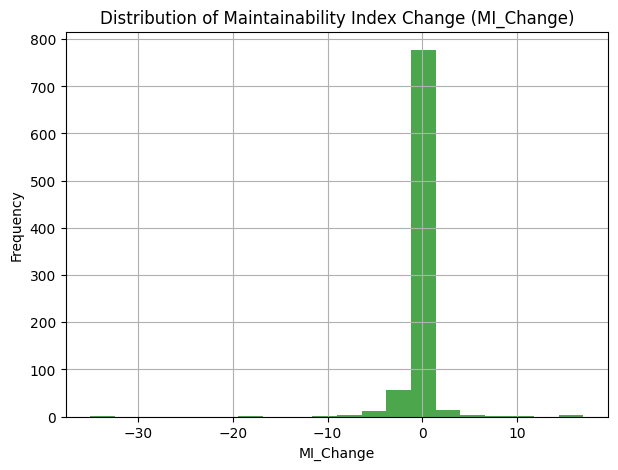

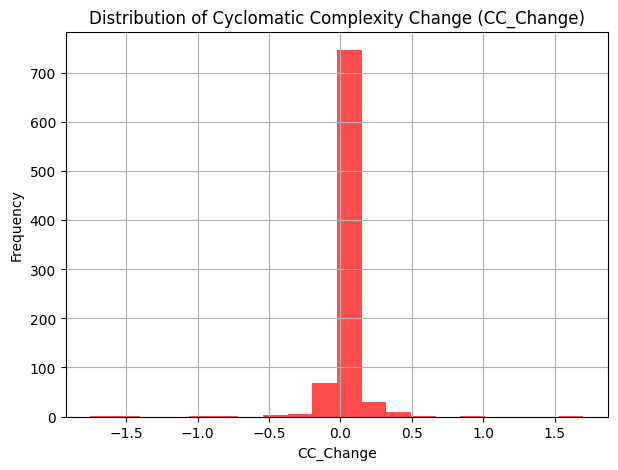

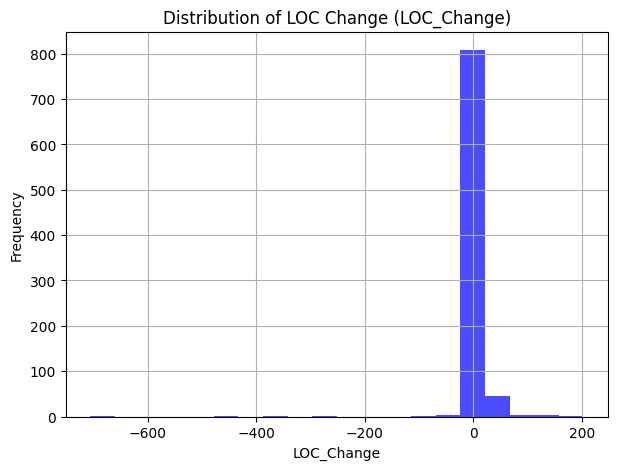

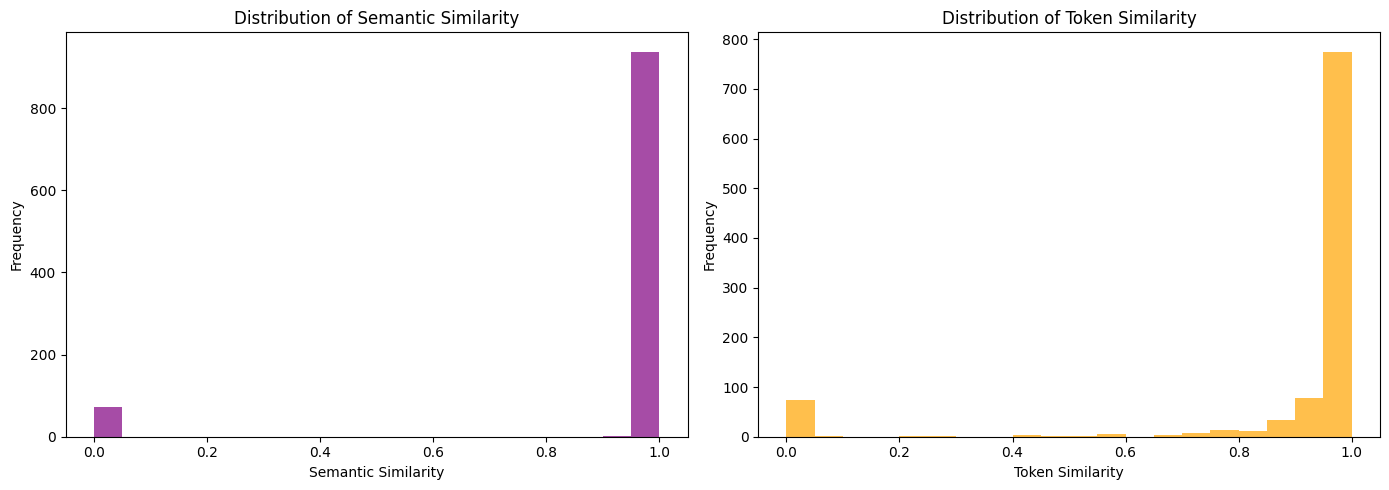

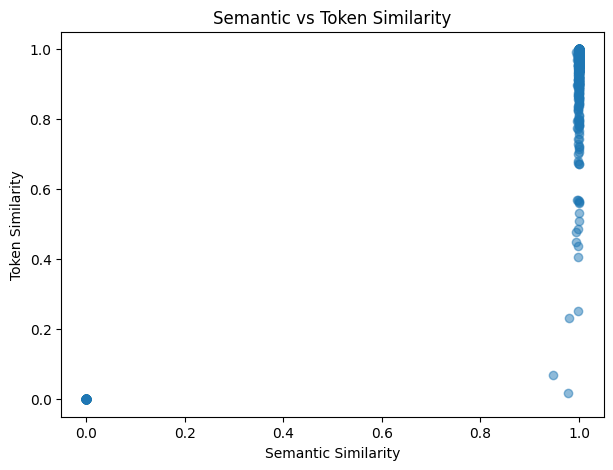

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
df['MI_Change'].dropna().hist(bins=20, alpha=0.7, color="green")
plt.title("Distribution of Maintainability Index Change (MI_Change)")
plt.xlabel("MI_Change")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(7,5))
df['CC_Change'].dropna().hist(bins=20, alpha=0.7, color="red")
plt.title("Distribution of Cyclomatic Complexity Change (CC_Change)")
plt.xlabel("CC_Change")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(7,5))
df['LOC_Change'].dropna().hist(bins=20, alpha=0.7, color="blue")
plt.title("Distribution of LOC Change (LOC_Change)")
plt.xlabel("LOC_Change")
plt.ylabel("Frequency")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14,5))


axes[0].hist(df['Semantic_Similarity'].dropna(), bins=20, alpha=0.7, color="purple")
axes[0].set_title("Distribution of Semantic Similarity")
axes[0].set_xlabel("Semantic Similarity")
axes[0].set_ylabel("Frequency")


axes[1].hist(df['Token_Similarity'].dropna(), bins=20, alpha=0.7, color="orange")
axes[1].set_title("Distribution of Token Similarity")
axes[1].set_xlabel("Token Similarity")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


plt.figure(figsize=(7,5))
plt.scatter(df['Semantic_Similarity'], df['Token_Similarity'], alpha=0.5)
plt.title("Semantic vs Token Similarity")
plt.xlabel("Semantic Similarity")
plt.ylabel("Token Similarity")
plt.show()


In [10]:
df.to_csv("lab3_final_dataset.csv", index=False)
print("Final dataset saved as lab3_final_dataset.csv")

Final dataset saved as lab3_final_dataset.csv
